In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [29]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [30]:
X

array([[ 9.4104642 ,  9.97996235],
       [ 2.78604896,  2.73522942],
       [ 3.40151864, -7.60649671],
       ...,
       [ 3.78973101, -7.5918532 ],
       [ 9.4796205 , 10.2781691 ],
       [ 7.81278806, 10.3998036 ]], shape=(1000, 2))

In [31]:
y

array([1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0,
       2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 2,
       0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1,
       1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1,
       2, 0, 2, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 0,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0,
       2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0,

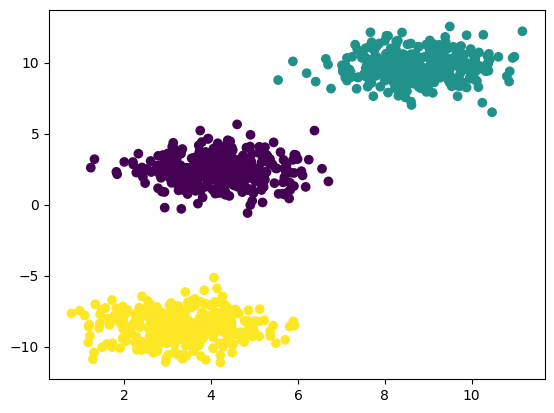

In [32]:
plt.scatter(X[:,0],X[:,1],c=y)

In [33]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [36]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
from sklearn.cluster import KMeans

In [38]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [39]:
wcss

[1340.0000000000002,
 382.4237736097133,
 115.60885666621027,
 91.38813058030246,
 66.68074390742031,
 47.361959417696035,
 41.312614529790956,
 35.935361622374636,
 30.027766371336693,
 27.879725871279216]

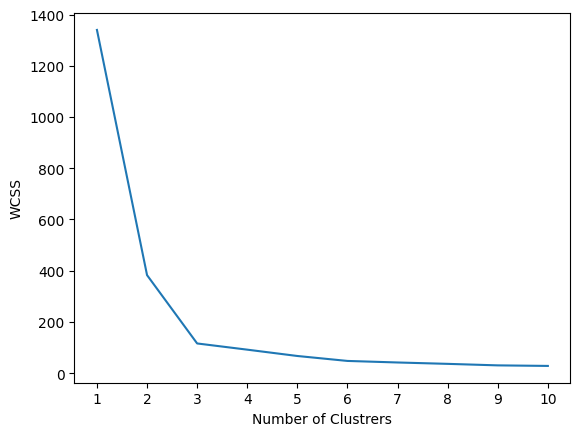

In [40]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [41]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [42]:
kmeans.fit_predict(X_train_scaled)

array([1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0,
       0, 2, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 0, 2, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1,
       0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1,
       1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1,
       2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 0,
       0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0,
       2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2,

In [43]:
y_pred=kmeans.predict(X_test_scaled)

In [44]:
y_pred

array([0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1,
       0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 2,
       2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1,
       1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1,
       1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 1,
       2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2,
       1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 2,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0,
       1, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2,

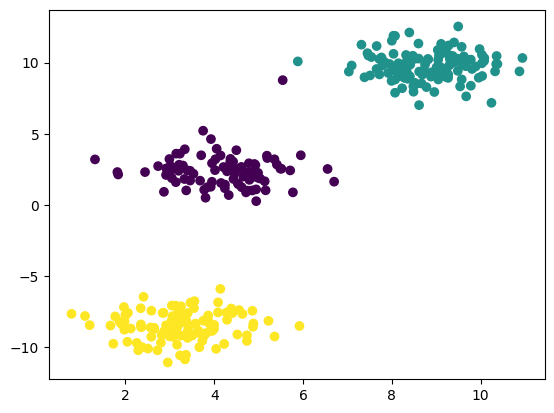

In [45]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [46]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [47]:
## kneelocator
!pip install kneed

In [48]:
from kneed import KneeLocator

In [49]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [50]:
kl.elbow

np.int64(3)

In [51]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [52]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [53]:
silhouette_coefficients

[0.644806699827937,
 0.7045659377448763,
 0.613500746771608,
 0.580048821288776,
 0.4783846582885287,
 0.45662310386325616,
 0.438673627029788,
 0.40902597241857813,
 0.420802780769414]

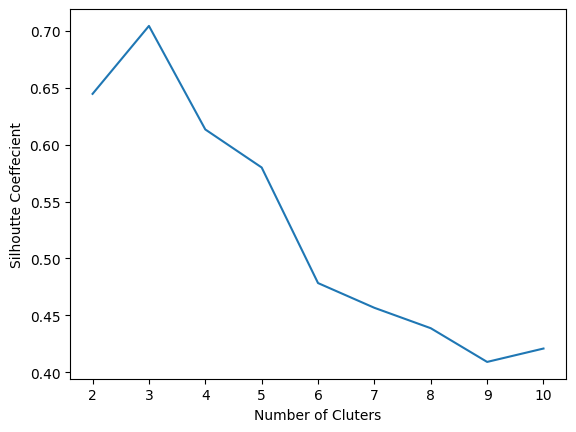

In [54]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()